In [35]:
import numpy as np
import matplotlib.pyplot as plt

from broadpy import InstrumentalBroadening
from broadpy.utils import load_example_data

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
# load PHOENIX model (R~1e6)
wave, flux = load_example_data()
IB = InstrumentalBroadening(wave, flux)


In [37]:
from astropy.io import fits
def load_nirspec_resolution_profile(file, wave=None): # this function can be imported from `broadpy.utils` too
    '''wave must be in [nm]'''
    with fits.open(file) as hdul:
        # print(hdul.info())
        data = hdul[1].data
        wave_grid = data['WAVELENGTH']*1e3 # [um] -> [nm]
        # disp = data['DLDS'] # ignore for now
        resolution = data['R']
        
    if wave is None:
        
        return wave_grid, resolution
    else:
        return wave, np.interp(wave, wave_grid, resolution)
    
wave, resolution = load_nirspec_resolution_profile('../data/jwst_nirspec_g235h_disp.fits', wave=wave)
fwhm = 2.99792458e5 / resolution # shape (N,)

In [38]:
flux_broadpy_fwhm_variable = InstrumentalBroadening(wave, flux)(fwhm=fwhm, kernel='gaussian_variable')

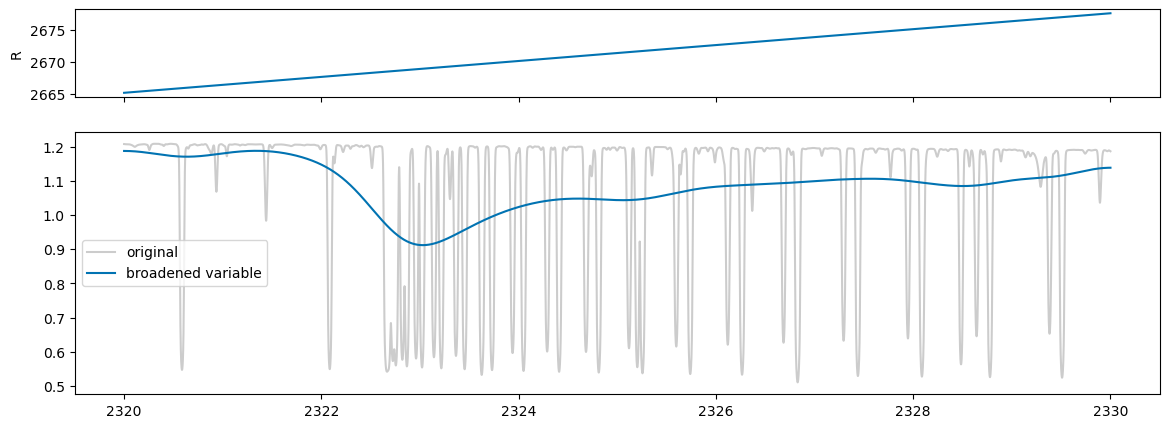

In [39]:
fig, _ax = plt.subplots(2, 1, figsize=(14, 5), sharex=True, gridspec_kw={'height_ratios': [1,3]})
ax_res = _ax[0]
ax = _ax[1:]

ax_res.plot(wave, resolution)
ax_res.set(ylabel='R')

ax[0].plot(wave, flux, label='original', color='black', alpha=0.2)
# ax[0].plot(wave, flux_broadpy, label='broadened')
ax[0].plot(wave, flux_broadpy_fwhm_variable, label='broadened variable')

ax[0].legend()
plt.show()